## 简述
一开始要初始化值

这个值在哪很关键

参数更新的时候

激活函数(sigmoid tanh)应该尽量落在中间

所以初始化策略不能随意, 

要想办法

还有一些优化策略

直接梯度下降? 还是加一些技巧?

学习率的调整

先调大再调小?
evaluation, loss可以衡量,但是需要 真值和预测值

往往没有真值, 需要看模型的目的

所以我们需要结合具体项目

又比如分类模型, 客户看不懂交叉熵, 于是用"准确率": 精准,召回



## 初始化策略

图片输入->(卷积->pooling)x很多次->FC->回归或者分类的功能模块

如何选一个合适的初始值

比如对于FC的权重值,要求:
- 非对称(对称位置的权重一定不能相同, 因为对称位置反传梯度一样,更新完还是一样,初始值就不能一样了),对称位置就是两个互换不影响
- 不能全0,不能全1,不能全某一个
- 不能太大 (针对sigmoid, tanh等等, 太大了梯度小, 收敛慢)
- 不能太小(针对relu,sigmoid)




### x教授 Xavier
### 高斯分布
假定 nn的每一层输入值的方差和输出值的方差相近

也就是让分布尽量一致

假定输出是y
$$\vec{y}=\vec{w}\cdot\vec{x^T}$$
对于n个输出的每个位置
$$y_{i}=\vec{w_{i}}\cdot\vec{x^T}$$
方差
$$Var(w_{i}\cdot x_{i})= Var(w_{i})\cdot Var(x_{i}) + E^2(x_{i})\cdot Var(w_{i}) + E^2(w_{i})\cdot Var(x_{i}) = Var(w_{i})\cdot Var(x_{i}) $$

如果样本都是符合正态分布,
$$x\sim N(0,\sigma_{x}) $$
w也符合正太分布
$$w_{i}\sim N(0,\sigma_{w})$$
每个xi都是同分布的
$$Var(Y)=n_{i}\cdot Var(w_{i}\cdot x_{i})$$
由于
$$ Var(Y)=Var(X)$$
所以
$$ n_{i}\cdot Var(w_{i})=1$$
$$ Var(w_{i})=\frac{1}{n_{i}}$$
$$ w_{i}\sim N(0,\frac{1}{\sqrt{n_{i}}})$$

考虑反传梯度
$$n_{i}=\frac{n_{i}+n_{i+1}}{2}$$
$$ w_{i}\sim N(0,\sqrt{\frac{2}{n_{i}+n_{i+1}}})$$

也有将wi满足均匀分布的

设
$$w_{i}\sim Uniform[-m,m]$$
已知
$$\sigma^{2}=(\sqrt{\frac{2}{n_{i}+n_{i+1}}})^{2}$$
根据
$$U[a,b]:\;E=\frac{a+b}{2}, \; Var = \frac{(b-a)^2}{12}$$
解得

$$w_{i}\sim Uniform(-\sqrt{\frac{6}{n_{i}+n_{i+1}}},\sqrt{\frac{6}{n_{i}+n_{i+1}}})$$



### kaiming教授 MSRA

激活函数不一定中心对称 

对于relu,它的分布不一样了就

这一层输入可能是上一层输出

均值不可能是0, 期望一定大于0

$$Var(Y)=n_{i}\cdot Var(w_{i})\cdot Var(x_{i})$$
$$Var(Y)=n_{i} \left [ E(w_{i}^{2})\cdot E(x_{i}^{2})-E^2(w_{i}) \cdot E^2(x_{i}) \right ]$$
考虑到
$$E^2(w_{i})=0$$
$$E^2(w_{i}) \cdot E^2(x_{i})\rightarrow E^2(w_{i}) \cdot E(x_{i}^{2})$$
$$Var(Y)=n_{i}\left [\left (E(w_{i}^{2})-E^2(w_{i})\right ) \cdot E({x_{i}}^2)\right ]$$
$$Var(Y)=n_{i}\cdot Var(w_{i}) \cdot E({x_{i}}^2)$$

对于relu
$$x_{i}=max(0,y_{i-1})$$
$$E(y_{i})=E(w_{i}\cdot x_{i})= E(w_{i})E(x_{i})=0$$

$$E({x_{i}}^2)=\frac{1}{2}E(y_{i-1}^{2})-0=\frac{1}{2}Var(y_{i-1})$$

$$Var(Y)=\frac{1}{2}n_{i}\cdot Var(w_{i})\cdot Var(y_{i-1})$$ 
保证输出和输入的方差一样
$$\frac{1}{2}n_{i}\cdot Var(w_{i})=1$$
$$ Var(w_{i}) = \frac{2}{n_{i}}$$
最终

如果是正态分布
$$w_{i}\sim N(0,\sqrt{\frac{2}{n_{i}}})$$
如果是均匀分布
$$w_{i}\sim Uniform(-\sqrt{\frac{6}{n_{i}}},\sqrt{\frac{6}{n_{i}}})$$

### 其他的初始化方法

- 全constant(不对称位置)
- uniform 
- positive uniform每一层wi服从U(0,1)且wi求和为1
- 双线性


## 预处理流程

传统方法有预处理流程

现在模型可以自动 


图像预处理不等于图像增广

传统的预处理, 有数据的归一化

去中心化再放缩(x-均值,再除以标准差)

或者减去最小值再除以最大值最小值之差

这样在训练时不会出现zigzag现象,更好地梯度下降

传统的方法: PCA, 白化

### PCA Principal Component Analysis 主成分分析

本质上是降维,不需要监督

比如,一组数据两个维度

当x2和x1有线性关系,比如x2=kx1

所以我们其实只用一个变量x1就行了

相当于原来的数据在一个新的方向x1'上找到了一个特征,

而数据在x2'上的方向上没有特征


如果线性关系不纯粹,有噪音,也没关系

![1](1.png)

看方差, 在x1'的方差大,

在x2'的方差小,含义是在这个方向没有太多信息量

每次来新值都趋于同一个值

也就是样本在变化但是特征可能不变

这个方向就可以扔掉了
$$(\lambda E-A)x=0$$
解出来的\lambda都是特征值

x1, x2...xn是特征向量

$$[x1, x2...xn]$$
是特征矩阵W,它是正交的

而且
$$W^T W= E$$
$$A=W \begin{bmatrix} \lambda_{1}&  &  & 0\\ & \lambda_{2} &  & \\ &  & \ddots & \\ 0&  &  & \lambda_{n} \end{bmatrix}W^T$$


初始的PCA算法:

找新的坐标基底(正交基底), 使得数据们在一个方向上方差最大,在另一个方向上方差最小, 然后这个小的就可以丢掉了

1. x去中心化, 减去均值
2. x矩阵(所有的样本, 每个样本是个向量,这是去中心化的)和X的转置, 也就是求特征值

比较大的特征值对应的特征向量, 就是新的方向,也就实现了降维 



### 白化

每个维度再除以特征值
![2](2.png)


## 优化器
梯度下降算法

一般不用全部数据, 原因有两个:
- 内存不够
- 缺少随机性, 可能会停在了局部的loss的极小值


把所有的batch训练玩, 也就是相当于所有数据过了一轮,叫一个Epoch

当batchsize=1, 叫做stochastic gradient descent

没有意义, 现在SGD成为了mini-batch 的同义词

### 动量

很多情况下,loss函数有很大的锯齿状,不是平滑直接到最小值的

每次多更新一点

动量和上一次的更新有关系
$$J(\vec{\theta})=J(\theta_{1},\theta_{2},\theta_{3},..., \theta_{n})$$
$$\triangledown J(\vec{\theta})=[\frac{\partial J(\theta)}{\partial \theta_{1}},\frac{\partial J(\theta)}{\partial \theta_{2}},\frac{\partial J(\theta)}{\partial \theta_{3}},...,\frac{\partial J(\theta)}{\partial \theta_{n}}]$$
$$ \theta_{i}^{t}=\theta_{i}^{t}-[\Delta\theta_{i}^{t}+\gamma\Delta\theta_{i}^{t-1}]$$

### SGD with Momentum

![sgd](gdm.jpg)
$$\vec{m}= \gamma\vec{m} + \eta \triangledown J$$
$$\vec{\theta}=\vec{\theta}-\vec{m}$$

\gamma < 1

### Nesterov accelarted GD
![nagd](nagd.jpg)
用超前梯度更新冲量
$$\vec{m}= \gamma \vec{m} + \eta \triangledown J(\vec{\theta}-\gamma \vec{m})$$
$$\vec{\theta}=\vec{\theta}-\vec{m}$$
超前梯度来更新冲量
### 自适应 adaptive methods
#### adagrad

一般来说让学习率从大到小变, 如何实现:
- 把学习率和迭代次数相关,
- 或者梯度下降的多学习率就小

ada系列就是后者,对历史梯度做了一个记录

$$s=s+\triangledown J \odot \triangledown J$$
$$ \theta = \theta - \frac{\eta}{\sqrt{s+\varepsilon }} \odot \triangledown J$$
$$\varepsilon\sim 1e^-8$$
学习率衰减的更快

#### RMS prop 方均差优化
把所有的历史梯度放进来不太好,历史梯度应该与最近时刻有关系

s原本为全部历史梯度的平方和

其实应该是加权的梯度平方和

时间近的权重大

$$s=\gamma s +(1-\gamma)\triangledown J \odot \triangledown J$$

这个odot表示对应位置相乘

最近的历史梯度比较重要
$$ \theta = \theta - \frac{\eta}{\sqrt{s+\varepsilon }} \cdot \triangledown J$$

#### Adam 结合学习率自适应和冲量
$$m=\beta_{1}m + (1-\beta_{1})\cdot \triangledown J$$
$$s = \beta_{2}s+(1-\beta_{2})\triangledown J \odot \triangledown J$$
随着次数t增加,影响应该越来越小
$$m= \frac{m}{1-\beta_{1}^{t}}$$
$$s= \frac{s}{1-\beta_{2}^{t}}$$
一般beta_{1}取0.9, beta_{2}取0.999
$$ \theta = \theta - \frac{\eta}{\sqrt{s+\varepsilon }} \cdot m$$
#### Adam + sgd
Adam快速收敛,然后sgd慢慢调节

### 近两年的技巧

lr从大到小调节

数据量大的模型,一开始warmup: lr小,训练5-10epoch

然后再转入lr从大到小

基本上就是warmup+ Adam + sgd
这是实践中得到的trick

## 衡量标准
### Recall/Precision/Accuracy


Accuracy:不同类别地位相同,, 猫分辨成猫,狗分辨成狗

银行贷款: 有还能力的, 给放贷没毛病, 有还能力的预测错了,没给放贷, 也没事. 没有还能力的,就很警惕,需要提升这方面的预测能力.这是对负利敏感

银行贷款是宁缺毋滥


新冠检测:关心有病的准确率, 是宁可错杀


真实\预测值|预测Positive|预测Negative
---|---|---|
真实Positive|TP|FN|
真实Negative|FP|TN|


$$ Accuracy=\frac{TP+TN}{TP+FP+FN+TN}$$
$$ Recall = \frac{TP}{TP+FN}$$
$$ Precision=\frac{TP}{TP+FP}$$
$$ TPR = Recall$$
$$ FPR = \frac{FP}{FP + TN}$$
Recall对FN比较敏感, 得了新冠病毒,却没预测出来

Precision对FP敏感, 本来他还不起贷款,却判断成能还


### ROC: Receiver operation character受试者操作特性

FPR-TPR曲线, 曲线下面积叫AUC  area under curve

FPR应该小,  TPR应该大

AUC也是越大约好,, 最理想就是矩形,面积是1

全部预测为Negative就是0点

全部预测为Positive就是(1,1)
![3](3.png)


这种情况下,看两块红色面积哪个大,就选那个

![4](4.png)

### F- Score

$$FScore=(1+\beta ^2)\frac{Precision\times Recall}{\beta ^2 Precision+Recall}$$
当\beta=1,叫F1-score, pr都很高,这样就很好


## 学习率调节

从大往小调:
- 不变
- 阶梯/步长/多步长
- 多项式
- 指数/反指数


这个和adam(已经给学习率加了系数的)的调节不冲突, adam 也可以加学习率调整

新时代的其他调整方法:
- 余弦退火 cosine annealing
    - ![5](5.png)
    - 冲破局部极小值点
    - 竞赛常用, 不考虑失效性
- 周期
- 查看loss更新
    - loss很多轮都不变了
    - loss在下降的时候就正常

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# 上帝视角
def loss(theta):
    # x is a tuple ([...],[...])
    return theta[0]**2+50*theta[1]**2

def loss_derivative(theta):
    # g(x)是x的梯度
    return np.array([2*theta[0],100*theta[1]])  

### 显示出梯度下降的路径

In [3]:
def my_contour(X,Y,Z,seq=None):
    plt.contour(X,Y,Z)
    plt.plot(0,0,marker='*')
    if seq is not None:
        arr = np.array(seq)
        for i in range(len(arr)-1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])

### 定义一些数据集

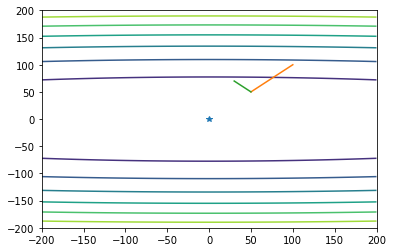

In [4]:
x = np.linspace(-200,200,1000)
y = np.linspace(-200,200,1000)
X,Y=np.array(np.meshgrid(x,y))
Z=X**2+50*Y**2
my_contour(X,Y,Z,seq=[[100,100],[50,50],[30,70]])

### 普通的gradient descent

In [5]:
def gradient_descent(start,learn_rate,loss_derivative, epoch=10,print_flag=True):
    curr_coordinate = np.array(start,dtype='float64')
    pass_list = [start.copy()]
    for i in range(epoch):
        grad = loss_derivative(curr_coordinate)
        curr_coordinate -= grad * learn_rate
        pass_list.append(curr_coordinate.copy())
        if print_flag:
            print(f"Epoch: {i}, grad: {grad}, curr_coordinate: {curr_coordinate}")
    return curr_coordinate, pass_list

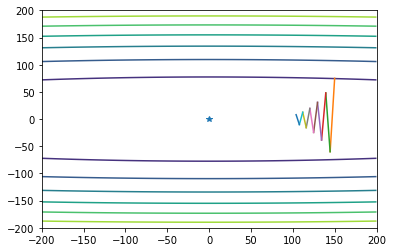

In [6]:
ret, route = gradient_descent([150,75],0.018,loss_derivative,epoch=10, print_flag=False)
my_contour(X,Y,Z,route)

### Gradient descent with momentum
$$\vec{m}= \gamma\vec{m} + \eta \triangledown J$$
$$\vec{\theta}=\vec{\theta}-\vec{m}$$


In [7]:
def gradient_descent_momentum(start,learn_rate,discount,loss_derivative, epoch=10,print_flag=True):
    curr_coordinate = np.array(start,dtype='float64')
    pass_list = [start.copy()]
    m = np.zeros_like(curr_coordinate)
    for i in range(epoch):
        grad = loss_derivative(curr_coordinate)
        m = m*discount+learn_rate*grad
        curr_coordinate -= m
        pass_list.append(curr_coordinate.copy())
        if print_flag:
            print(f"Epoch: {i}, grad: {grad}, curr_coordinate: {curr_coordinate}")
    return curr_coordinate, pass_list

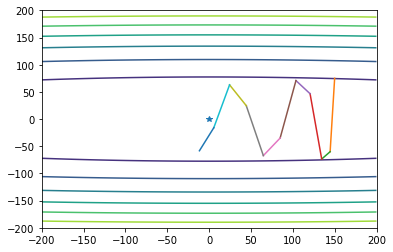

In [8]:
ret, route = gradient_descent_momentum([150,75],0.018,0.9,loss_derivative,epoch=10, print_flag=False)
my_contour(X,Y,Z,route)

### Nesterov accelerated GD
用超前梯度更新冲量
$$\vec{m}= \gamma \vec{m} + \eta \triangledown J(\vec{\theta}-\gamma \vec{m})$$
$$\vec{\theta}=\vec{\theta}-\vec{m}$$

In [9]:
def nesterov_acceler_gradient_descent_(start,learn_rate,discount,loss_derivative, epoch=10,print_flag=True):
    curr_coordinate = np.array(start,dtype='float64')
    pass_list = [start.copy()]
    
    pre_grad = np.zeros_like(curr_coordinate)
    for i in range(epoch):

        pre_grad = discount * pre_grad + learn_rate* loss_derivative(curr_coordinate - discount*pre_grad)

        curr_coordinate -= pre_grad

        pass_list.append(curr_coordinate.copy())
        if print_flag:
            print(f"Epoch: {i}, grad: {grad}, curr_coordinate: {curr_coordinate}")
    return curr_coordinate, pass_list

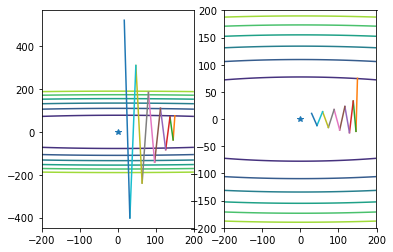

In [10]:
ret, route = nesterov_acceler_gradient_descent_([150,75],0.015,0.9,loss_derivative,epoch=10, print_flag=False)
plt.subplot(121)
my_contour(X,Y,Z,route)
ret, route = nesterov_acceler_gradient_descent_([150,75],0.013,0.9,loss_derivative,epoch=10, print_flag=False)
plt.subplot(122)
my_contour(X,Y,Z,route)

### RMS Prop

$$s=\gamma s +(1-\gamma)\triangledown J \odot \triangledown J$$

$$ \theta = \theta - \frac{\eta}{\sqrt{s+\varepsilon }} \cdot \triangledown J$$


In [11]:
def rms_gd(start,learn_rate,decay_rate,loss_derivative, epoch=10,print_flag=True, varepsilon=1e-8):
    curr_coordinate = np.array(start,dtype='float64')
    pass_list = [start.copy()]
    history = np.zeros_like(curr_coordinate)
    for i in range(epoch):
        grad = loss_derivative(curr_coordinate)
        history = decay_rate * history + (1-decay_rate)*grad**2

        curr_coordinate -= learn_rate*grad/(np.sqrt(history+ varepsilon))

        pass_list.append(curr_coordinate.copy())
        if print_flag:
            print(f"Epoch: {i}, grad: {grad}, curr_coordinate: {curr_coordinate}")
    return curr_coordinate, pass_list

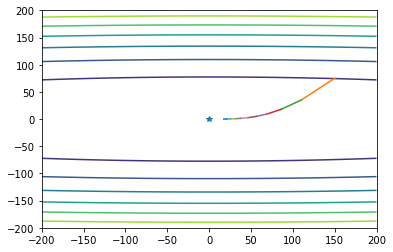

In [12]:
ret, route = rms_gd([150,75],4,0.99,loss_derivative,epoch=10, print_flag=False)
my_contour(X,Y,Z,route)